# Project Overview: Customer Complaint Classification System

This project aims to build a customer complaint classification system.

We will utilize Non-negative Matrix Factorization (NMF) to perform topic modeling on a dataset of unlabeled customer complaints (JSON). This will allow us to group complaints into five predefined categories:

* Credit/Prepaid Card
* Bank Accounts
* Theft/Disputes
* Mortgages/Loans
* Others

Subsequently, we will train a supervised machine learning model (e.g., Logistic Regression, Decision Tree, Random Forest) on the categorized data to automate the routing of new customer complaints.

## Project Workflow: Key Pipeline Stages

To successfully complete this project, the following eight core pipeline stages must be executed:

1.  **Data Ingestion:** Load the dataset for analysis.
2.  **Text Preprocessing:** Clean and prepare the text data for modeling.
3.  **Exploratory Data Analysis (EDA):** Analyze the data to gain insights and identify patterns.
4.  **Feature Engineering:** Extract meaningful features from the text data.
5.  **Topic Modeling:** Apply topic modeling techniques to uncover underlying themes.
6.  **Supervised Model Development:** Build a predictive model using supervised learning algorithms.
7.  **Model Training and Evaluation:** Train the model and assess its performance.
8.  **Model Deployment/Inference:** Implement the model for predicting on new data.

## Importing the necessary libraries

In [1]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
#spacy.require_gpu()
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from pprint import pprint
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()


'''
import json
import numpy as np
import pandas as pd
import re, nltk, spacy, string 
import en_core_web_sm
nlp=en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from pprint import pprint
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()
'''

"\nimport json\nimport numpy as np\nimport pandas as pd\nimport re, nltk, spacy, string \nimport en_core_web_sm\nnlp=en_core_web_sm.load()\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n%matplotlib inline \nimport warnings\nwarnings.filterwarnings('ignore')\nfrom plotly.offline import plot\nimport plotly.graph_objects as go\nimport plotly.express as px\nfrom sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer\nfrom pprint import pprint\nfrom tqdm import tqdm, tqdm_notebook\ntqdm.pandas()\n"

In [2]:
# change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#practice 
# pd.set_option('display.max_colwidth',None)
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [3]:
# Opening JSON file 
f = open('complaints-2021-05-14_08_16.json')
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

In [4]:
# First 5 rows of the dataframe
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,_source.consumer_disputed,_source.product,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [5]:
df['_source.product'].value_counts()

# practice
# df['_source.product'].value_counts()



_source.product
Mortgage                                                                        22725
Checking or savings account                                                     12147
Credit card or prepaid card                                                     10797
Credit card                                                                     10373
Bank account or service                                                          9816
Credit reporting, credit repair services, or other personal consumer reports     4310
Debt collection                                                                  3201
Money transfer, virtual currency, or money service                               1500
Consumer Loan                                                                    1029
Vehicle loan or lease                                                             892
Student loan                                                                      866
Money transfers                       

## Data preparation

In [6]:
# Inspect the dataframe to understand the given data.
df.info()

'''
df.info()
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

'\ndf.info()\n'

In [7]:
#print the column names
print("Columns are: ", df.columns.values)

''' 
print("Columns are : ", df.columns.values)
'''

Columns are:  ['_index' '_type' '_id' '_score' '_source.tags' '_source.zip_code'
 '_source.complaint_id' '_source.issue' '_source.date_received'
 '_source.state' '_source.consumer_disputed' '_source.product'
 '_source.company_response' '_source.company' '_source.submitted_via'
 '_source.date_sent_to_company' '_source.company_public_response'
 '_source.sub_product' '_source.timely' '_source.complaint_what_happened'
 '_source.sub_issue' '_source.consumer_consent_provided']


' \nprint("Columns are : ", df.columns.values)\n'

#### Renaming columns for clean view

In [8]:
#Assign new column names
df.rename(columns={'_index':'index',
  '_type':'type',
  '_id':'id',
  '_score':'score',
  '_source.tags':'tags',
  '_source.zip_code':'',
 '_source.complaint_id':'complaint_id',
 '_source.issue':'issue',
 '_source.date_received':'date_received',
 '_source.state':'state',
 '_source.consumer_disputed':'consumer_disputed',
 '_source.product':'product',
 '_source.company_response':'company_response',
 '_source.company':'company',
 '_source.submitted_via':'submitted_via',
 '_source.date_sent_to_company':'date_sent_to_company',
 '_source.company_public_response':'company_public_response',
 '_source.sub_product':'sub_product',
 '_source.timely':'timely',
 '_source.complaint_what_happened':'complaint_what_happened',
 '_source.sub_issue':'sub_issue',
 '_source.consumer_consent_provided':'consumer_consent_provided'},inplace=True)




'''
df.rename(columns = {'_index':'index'}, inplace = True)
'''


"\ndf.rename(columns = {'_index':'index'}, inplace = True)\n"

In [9]:
df.head()


,index,type,id,score,tags,,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [10]:
blank_count = df['complaint_what_happened'].isnull().sum() + (df['complaint_what_happened'] == '').sum()

print(f"Number of blank entries in 'complaint_what_happened': {blank_count}")

'''
blank_count=df['column'].isnull().sum() + (df['column']=='').sum()
print(f"Number of blank entries in 'column': {blank_count}")
'''


Number of blank entries in 'complaint_what_happened': 57241


'\nblank_count=df[\'column\'].isnull().sum() + (df[\'column\']==\'\').sum()\nprint(f"Number of blank entries in \'column\': {blank_count}")\n'

In [11]:
df.shape



(78313, 22)

In [12]:
#Assign nan in place of blanks in the complaint_what_happened column
df['complaint_what_happened'].replace('', np.nan, inplace=True)




In [13]:
# Null values count after replacing blanks with nan
df['complaint_what_happened'].isnull().sum()



np.int64(57241)

In [14]:
#Remove all rows where complaint_what_happened column is nan
df.dropna(subset=['complaint_what_happened'],inplace=True)



In [15]:
df.shape

(21072, 22)

## Text Preparation for Topic Modeling

Following the removal of empty complaints, the text data requires thorough cleaning and preprocessing:

**Initial Cleaning Steps:**

* Convert all text to lowercase.
* Remove any text enclosed within square brackets (`[]`).
* Eliminate all punctuation marks.
* Remove words containing numerical digits.

**Advanced Preprocessing:**

* Lemmatize the cleaned text to reduce words to their base form.
* Extract Part-of-Speech (POS) tags from the lemmatized text.
* Filter and retain only words tagged as nouns (`NN`).

In [16]:
# Write your function here to clean the text and remove all the unnecessary elements.
def clean_text(text):
  text=text.lower()  #convert to lower case
  text=re.sub(r'^\[[\w\s]\]+$',' ',text) #Remove text in square brackets
  text=re.sub(r'[^\w\s]',' ',text) #Remove punctuation
  text=re.sub(r'^[a-zA-Z]\d+\w*$',' ',text) #Remove words with numbers
  return text

'''
def function(input)
   text=text.lower()
   text=re.sub('check string', 'replace with',text)
   text=re.sub('check string, 'replcae with', text)
   text=re.sub('check string','replace with', text)
   return text 

'''

"\ndef function(input)\n   text=text.lower()\n   text=re.sub('check string', 'replace with',text)\n   text=re.sub('check string, 'replcae with', text)\n   text=re.sub('check string','replace with', text)\n   return text \n\n"

# Lemmatize : reducing words to their base or dictionary form

Removing common "stop words." <br>
Reducing words to their base form (lemma) using spaCy. <br>
Returning the cleaned, lemmatized text.

In [17]:
import en_core_web_sm
nlp = en_core_web_sm.load()


In [18]:
#Write your function to Lemmatize the texts
stopwords = nlp.Defaults.stop_words
def lemmatization(texts):
    lemma_sentences = []
    for doc in tqdm(nlp.pipe(texts)):
        sent = [token.lemma_ for token in doc if token.text not in set(stopwords)]
        lemma_sentences.append(' '.join(sent))
    return lemma_sentences

''' 
stopwords = nlp.Defaults.stop_words 
def lemmafunction(texts):
    lemma_sentences = []
    for doc in tqdm(nlp.pipe(texts)):
        sent = [token.lemma_ for token in doc if token.text not in set(stopwords)
        lemma_sentences.append(' '.join(sent)
    return lemmafunction

'''

" \nstopwords = nlp.Defaults.stop_words \ndef lemmafunction(texts):\n    lemma_sentences = []\n    for doc in tqdm(nlp.pipe(texts)):\n        sent = [token.lemma_ for token in doc if token.text not in set(stopwords)\n        lemma_sentences.append(' '.join(sent)\n    return lemmafunction\n\n"

In [19]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame()

'''
df_clean=pd.DataFrame()
'''

'\ndf_clean=pd.DataFrame()\n'

``This code applies a clean_text function to each element of the 'complaint_what_happened' column in the dataframe df, storing the cleaned results in a new column called df_clean['complaint_what_happened']. The progress_apply function likely displays a progress bar during the cleaning process``

In [20]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [21]:
# Clean text columns
df_clean['complaint_what_happened'] = df['complaint_what_happened'].progress_apply(lambda x: clean_text(x))

'''
df_clean['column']=df['column'].progress_apply(lambda x: clean_text(x))
'''

100%|█████████████████████████████████████████████████████████████████████████| 21072/21072 [00:01<00:00, 18525.42it/s]


"\ndf_clean['column']=df['column'].progress_apply(lambda x: clean_text(x))\n"

In [22]:
# lemmitize the text columns
df_clean['complaint_what_happened_lemmatized'] = lemmatization(df_clean['complaint_what_happened'])

'''
df_clean['column']=lemmatization(df_clean['column'])
'''

21072it [20:55, 16.79it/s] 


"\ndf_clean['column']=lemmatization(df_clean['column'])\n"

In [23]:
print((stopwords))
if 'name' in stopwords:
    print('true')
else:
    print('false')

for doc in tqdm(nlp.pipe(['wrote'])):
    token=doc[0]
    print(f"Text: {token.text}")
    print(f"Lemma: {token.lemma_}")
    print(f"POS: {token.pos_}")
    print(f"Is Stopword: {token.is_stop}")

{'ourselves', 'few', 'within', 'toward', 'side', 'hence', 'us', 'seeming', 'those', 'herself', 'both', 'whenever', 'less', 'sometime', 'through', 'once', 're', 'nobody', 'were', 'either', 'in', 'over', 'however', 'wherever', 'made', 'everywhere', 'whom', 'regarding', 'hers', 'put', 'or', 'somehow', 'whose', 'will', 'your', "'d", 'well', 'back', 'some', 'another', 'themselves', 'nevertheless', 'to', '’re', 'cannot', 'whereby', 'had', '’d', 'afterwards', 'moreover', 'nothing', 'most', 'elsewhere', 'upon', 'if', 'down', 'part', 'what', 'this', 'five', 'indeed', 'them', 'each', 'around', 'yourself', 'much', 'into', 'thus', 'here', 'beside', 'which', 'almost', 'make', 'name', 'have', 'yet', 'someone', 'seem', 'bottom', 'never', 'yours', 'used', 'the', 'anyhow', 'just', 'even', 'wherein', 'where', 'somewhere', 'more', 'before', 'by', 'it', "'ve", 'whereupon', 'namely', 'with', 'latter', 'yourselves', '‘ll', 'off', 'whole', 'anything', 'who', 'eight', 'my', 'else', 'twelve', 'did', 'of', 'bec

1it [00:00, 68.85it/s]

Text: wrote
Lemma: write
POS: VERB
Is Stopword: False


In [24]:
df_clean.head()


,complaint_what_happened,complaint_what_happened_lemmatized
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on xx xx 2018 this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,xx xx 2018 try book xxxx xxxx ticket come offer 300 00 apply ticket apply reward card information offer minute notify screen decision immediately contact xxxx refer chase bank immediately contact chase bank 10minute get notification screen tell chase representative speak application deny state ask information xxxx offer explain approve credit offer get apply account statement purchase ticket explicitly tell glad get deny absolutely long interested account ask application withdraw representative oblige happen later 10min put application xx xx 2018 notwithstanding explicit request proceed application contrary tell chase representative chase fact ahead open credit account xx xx 2018 report credit report chase refuse 

In [25]:
# adding category and sub_category columns to the dataframe for better topic identification
df_clean['category'] = df['product']
df_clean['sub_category'] = df['sub_product']


This code extracts only nouns (NN) from lemmatized text using spaCy, creating a new column with strings containing just those nouns. The extract_pos_tags function processes each text, filters for NN tags, and joins the remaining words into a single string.

#### This will help further: <br>
Focus on Core Concepts <br> 
Topic Modeling <br>
Information Retrieval <br>
Reduced Dimensionality <br>
Noise Reduction <br>

In [26]:
#Write your function to extract the POS tags only for NN
def extract_pos_tags(texts):
    pos_sentences = []
    for doc in tqdm(nlp.pipe(texts)):
        sent = [token.text for token in doc if token.tag_ == 'NN']
        pos_sentences.append(' '.join(sent))
    return pos_sentences

df_clean["complaint_POS_removed"] = extract_pos_tags(df_clean['complaint_what_happened_lemmatized'])


'''

def function(texts):
    pos_sentences=[]
    for doc in tqdm(nlp.pipe(texts)):
        sent=[token.text for token in doc if token.tag_ == 'NN']
        pos_sentences.append(' '.join(sent))
    return pos_sentences


'''

21072it [09:36, 36.53it/s]


"\n\ndef function(texts):\n    pos_sentences=[]\n    for doc in tqdm(nlp.pipe(texts)):\n        sent=[token.text for token in doc if token.tag_ == 'NN']\n        pos_sentences.append(' '.join(sent))\n    return pos_sentences\n\n\n"

In [27]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help chase debt verification statement bank validate debt mail month attempt debt information consumer chase account advance help
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,agent anniversary date change agent information order account change anniversary date agent mislead
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,card application identity consent service credit verify identity applicant
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on xx xx 2018 this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,xx xx 2018 try book xxxx xxxx ticket come offer 300 00 apply ticket apply reward card information offer minute notify screen decision immediately contac

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




In [28]:
import plotly.graph_objects as go

In [30]:
# Write your code here to visualise the data according to the 'Complaint' character length
df_clean['complaint_length'] = df_clean['complaint_what_happened'].str.len()
df_clean['complaint_what_happened_lemmatized_length'] = df_clean['complaint_what_happened_lemmatized'].str.len()
df_clean['complaint_POS_removed_length'] = df_clean['complaint_POS_removed'].str.len()

fig = go.Figure()
fig.add_trace(go.Histogram(x=df_clean['complaint_length'], name='Complaint'))
fig.add_trace(go.Histogram(x=df_clean['complaint_what_happened_lemmatized_length'], name='Complaint Lemmatized'))
fig.add_trace(go.Histogram(x=df_clean['complaint_POS_removed_length'], name='Complaint POS Removed'))
fig.update_layout(barmode='overlay', title='Complaint Character Length', xaxis_title='Character Length', yaxis_title='Count')
fig.update_traces(opacity=0.75)
fig.show()


'''
df['column_len']=df['column'].str.len()
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['column_len'],name='Complaint))
fig.update_layout(barmode='overlay',title='Complaint len',xaxis_title='Char len', yaxis_title='count')
fig.update(traces(opacity=0.75)
fig.show()
'''

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

#### Find the top 40 words by frequency among all the articles after processing the text.

In [32]:
#pip install WordCloud

  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


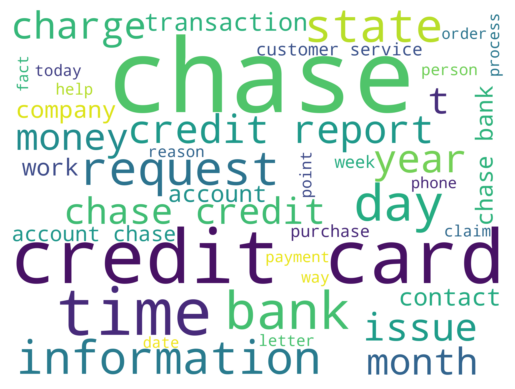

'\nfrom wordcloud import WordCloud\nwordcloud=WordCloud(stopwords=stopwords,background_color=\'white\',width=2000, height = 2500, max_words=40).generate(\' \'.join(df_clean[\'column\']))\nplt.imshow(wordcloud,interpolation=\'bilinear\', aspect =\'auto\')\nplt.axis("off")\nplt.show()\n'

In [33]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text
from wordcloud import WordCloud
wordcloud=WordCloud(stopwords=stopwords, background_color='white', width=2000, height=1500,max_words=40).generate(' '.join(df_clean['complaint_POS_removed']))
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")
plt.show()

'''
from wordcloud import WordCloud
wordcloud=WordCloud(stopwords=stopwords,background_color='white',width=2000, height = 2500, max_words=40).generate(' '.join(df_clean['column']))
plt.imshow(wordcloud,interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.show()
'''

``Removing "-PRON-" cleans up the text by eliminating a placeholder token that was generated during lemmatization, leading to cleaner and more meaningful text data``

In [34]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

In [35]:
df_clean.head(2)

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help chase debt verification statement bank validate debt mail month attempt debt information consumer chase account advance help,486,311,137,morning help chase debt verification statement bank validate debt mail month attempt debt information consumer chase account advance help
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,agent anniversary date change agent information order account change anniversary date agent mislead,355,229,99,agent anniversary date change agent information order account change anniversary date agent mislead


#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [36]:
# function to get the specified top n-grams
def get_top_n_words(corpus, n=None,count=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:count]



In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

In [38]:
#Print the top 10 words in the unigram frequency and plot the same using a bar graph
unigram = get_top_n_words(df_clean['Complaint_clean'], 1,10)
for word, freq in unigram:
    print(word, freq)
px.bar(x=[word for word, freq in unigram], y=[freq for word, freq in unigram], title='Top 10 Unigrams')

'''
unigram= get_top_n_words(df['column'],1,10)
for word, freq in unigram:
    print(word,freq)
px.bar(x=[word for word,freq in unigram],y=[freq for word, freq in unigram],title='Top 10 Unigrams')
'''

chase 61898
account 43434
credit 33867
card 30141
payment 21159
charge 16276
time 16033
bank 15199
day 12874
money 11747


"\nunigram= get_top_n_words(df['column'],1,10)\nfor word, freq in unigram:\n    print(word,freq)\npx.bar(x=[word for word,freq in unigram],y=[freq for word, freq in unigram],title='Top 10 Unigrams')\n"

credit card 12832
credit report 3907
chase credit 3302
chase bank 3036
customer service 3010
account chase 2950
call chase 2781
chase account 2525
contact chase 2096
account account 2057


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

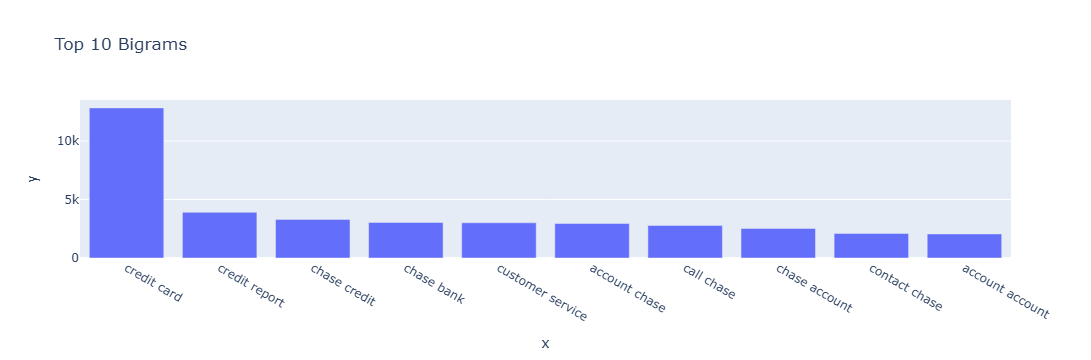

In [39]:
#Print the top 10 words in the bigram frequency and plot the same using a bar graph
bigram = get_top_n_words(df_clean['Complaint_clean'], 2,10)
for word, freq in bigram:
    print(word, freq)
px.bar(x=[word for word, freq in bigram], y=[freq for word, freq in bigram], title='Top 10 Bigrams')

chase credit card 2331
credit card account 1060
credit card company 984
credit card chase 877
chase customer service 634
inquiry credit report 491
charge credit card 478
credit card credit 462
credit reporting agency 385
account credit card 359


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

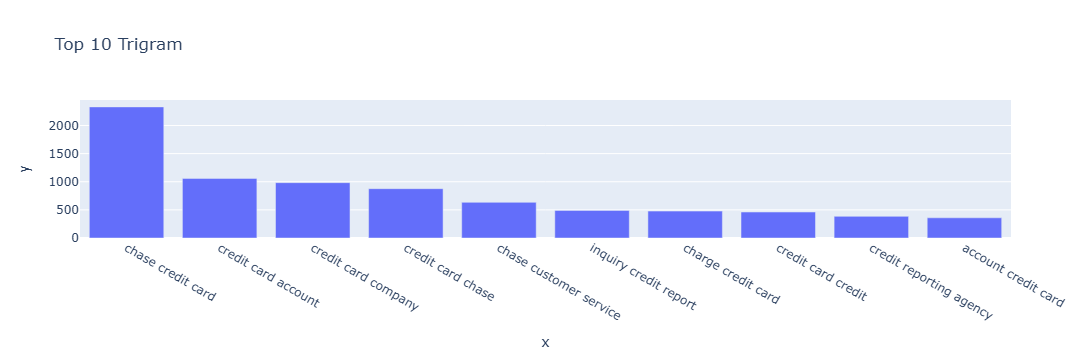

In [40]:
#Print the top 10 words in the trigram frequency and plot the same using a bar graph
trigram = get_top_n_words(df_clean['Complaint_clean'], 3,10)
for word, freq in trigram:
    print(word, freq)
px.bar(x=[word for word, freq in trigram], y=[freq for word, freq in trigram], title='Top 10 Trigram')

## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [41]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [42]:
#All masked texts has been removed
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help chase debt verification statement bank validate debt mail month attempt debt information consumer chase account advance help,486,311,137,morning help chase debt verification statement bank validate debt mail month attempt debt information consumer chase account advance help
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,agent anniversary date change agent information order account change anniversary date agent mislead,355,229,99,agent anniversary date change agent information order account change anniversary date agent mislead
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,card application identity consent service credit verify identity applicant,224,149,74,card application identity consent service credit verify identity applicant
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative

## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"


.
* **TF-IDF (Term Frequency-Inverse Document Frequency):** This is a statistical measure that reflects how important a word is to a document in a collection or corpus.
    * **Term Frequency (TF):** How often a word appears in a document.
    * **Inverse Document Frequency (IDF):** How rare a word is across the entire collection of documents.
* **Matrix:** A table of numbers arranged in rows and columns. In this context:
    * Rows typically represent individual documents.
    * Columns represent unique words (terms) from the entire collection.
    * The values in the matrix represent the TF-IDF scores for each word in each document.
* **Features:** The TF-IDF scores act as features that represent the text data in a numerical format that machine learning algorithms can understand.

**In essence:**

The process takes text, calculates how important each word is in each text compared to all the other texts, and then puts those importance scores into a table (matrix). This table can then be used by computers to analyze the text.


In [43]:
#Write your code here to initialise the TfidfVectorizer 
tf_idf_vec=TfidfVectorizer(max_df=0.98,min_df=2,stop_words='english')

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [44]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
tfidf=tf_idf_vec.fit_transform(df_clean['Complaint_clean'])

In [45]:
tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 650576 stored elements and shape (21072, 6222)>

## NMF Topic Modeling

NMF, an unsupervised method, decomposes high-dimensional data into non-negative, lower-dimensional representations, revealing underlying topics without pre-defined labels.

Tasks:

* Determine optimal cluster count.
* Generate word clusters using the optimal count.
* Evaluate cluster coherence against complaint data.
* Refine cluster labels as needed.
* Assign meaningful topic names to clusters.

In [46]:
from sklearn.decomposition import NMF

## Iterative Topic Modeling with NMF
The goal is to discover the underlying themes or subjects within a collection of documents.


Finding the optimal number of topics for NMF requires an experimental approach.

The primary parameter, the number of components (topics), significantly impacts the resulting topic quality. Careful iteration and evaluation are essential to determine the best configurat


Specifies the desired number of topics, aligning the model with your predetermined categorization.
Ensures reproducibility of the NMF results, making your analysis consistent and reliable.ion.

In [47]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5

#keep the random_state =40
nmf_model = NMF(n_components=num_topics, random_state=40)

This line is the core of the NMF topic modeling process. It's where the model learns the topics from your text data.
If the vocabulary size is too large, it might indicate that you need to apply more aggressive filtering or stemming/lemmatization.
It allows you to understand the size of the vocabulary that the NMF model is using to generate the topics.

In [48]:
nmf_model.fit(tfidf)
len(tf_idf_vec.get_feature_names_out())

6222

#### Topic Interpretation:
It allows you to see which words are most strongly associated with each topic.
This helps you understand the meaning and theme of each topic.

In [49]:
#Print the Top15 words for each of the topics
for index, topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index} with tf-idf score')
    print([tf_idf_vec.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0 with tf-idf score
['customer', 'claim', 'business', 'transaction', 'number', 'transfer', 'branch', 'day', 'fund', 'deposit', 'bank', 'chase', 'money', 'check', 'account']


THE TOP 15 WORDS FOR TOPIC #1 with tf-idf score
['reporting', 'year', 'letter', 'application', 'limit', 'debt', 'information', 'company', 'score', 'account', 'chase', 'inquiry', 'report', 'card', 'credit']


THE TOP 15 WORDS FOR TOPIC #2 with tf-idf score
['error', 'year', 'account', 'credit', 'date', 'chase', 'time', 'day', 'auto', 'fee', 'pay', 'statement', 'month', 'balance', 'payment']


THE TOP 15 WORDS FOR TOPIC #3 with tf-idf score
['refund', 'statement', 'time', 'balance', 'fraud', 'claim', 'service', 'merchant', 'purchase', 'transaction', 'chase', 'fee', 'dispute', 'card', 'charge']


THE TOP 15 WORDS FOR TOPIC #4 with tf-idf score
['refinance', 'sale', 'foreclosure', 'request', 'time', 'rate', 'document', 'letter', 'year', 'property', 'home', 'modification', 'chase', 'mortgage

Following tells you how much each complaint "belongs" to each topic.

In [50]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4
topic_values = nmf_model.transform(tfidf)
topic_values.argmax(axis=1)

array([4, 0, 1, ..., 3, 2, 2], shape=(21072,))

In [51]:
#Assign the best topic to each of the cmplaints in Topic Column
df_clean['Topic'] = topic_values.argmax(axis=1)

In [52]:
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help chase debt verification statement bank validate debt mail month attempt debt information consumer chase account advance help,486,311,137,morning help chase debt verification statement bank validate debt mail month attempt debt information consumer chase account advance help,4
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,agent anniversary date change agent information order account change anniversary date agent mislead,355,229,99,agent anniversary date change agent information order account change anniversary date agent mislead,0
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,card application identity consent service credit verify identity applicant,224,149,74,card application identity consent service credit verify identity applicant,1
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase re

In [53]:
#Print the first 5 Complaint for each of the Topics
df_clean.groupby('Topic').head(5).sort_values(by='Topic')

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean,Topic
27,i opened an account with chase bank on xxxx and used a code for xxxx bonus i called to follow up on xx xx xxxx about the terms and was told everything was on the account and once i made xxxx direct deposit the bonus would be paid out in 10 days as of xxxx i had made the required deposits and was told my account never had the coupon code applied and it was past the 21 days to do so so no bonus would be paid,open account chase bank xxxx code xxxx bonus call follow xx xx xxxx term tell account xxxx direct deposit bonus pay 10 day xxxx require deposit tell account coupon code apply past 21 day bonus pay,Checking or savings account,Checking account,account bonus call follow deposit bonus day deposit account coupon code day bonus pay,413,202,85,account bonus call follow deposit bonus day deposit account coupon code day bonus pay,0
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,agent anniversary date change agent information order account change anniversary date agent mislead,355,229,99,agent anniversary date change agent information order account change anniversary date agent mislead,0
14,my grand son give me check for 1600 00 i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen xx xx 2018 check number xxxx claim number is xxxx with chase,grand son check 1600 00 deposit chase account fund clear chase bank close account pay money say need speek grand son check clear money take chase bank refuse pay money grand son call chase 2 time tell verify check owner country time date happen xx xx 2018 check number xxxx claim number xxxx chase,Checking or savings account,Checking account,son deposit chase account fund account pay money son money chase bank money son chase time check owner country time date check number claim number chase,477,304,152,son deposit chase account fund account pay money son money chase bank money son chase time check owner country time date check number claim number chase,0
17,with out notice j p morgan chase restricted my account by my debit card tuesday xx xx 2019 on thursday xx xx 2019 i went into a branch after being advised by a customer service representative that my account would actually be closed i went into the branch to see how i can remove the funds that are in there currently in as well as if my direct deposit from my place of employment would be returned the bank associate and the customer service representative assured me that the funds would post but they may take an additional business day that saturday i attempted to go inside of a branch yet again to retrieve my funds that actually did post on friday xx xx 2019 upon looking at my account i realize that the funds have been reversed and no longer were present on my current statement ive been called and i was told that it may take two business day stating tuesday xx xx xxxx would be the date that my funds would be available to withdraw fro

#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

#### No Automatic Labeling:
It's crucial to understand that NMF itself does not automatically label the topics. It only groups words and documents based on statistical patterns.
The assignment of human-readable names is a manual, interpretive step.

#### How the Topic Names Are Assigned:

Qualitative Analysis:
After running the NMF model and examining the top words for each topic (as did in the previous step), manually analyzed those words.
Based on the words that appeared most frequently and strongly in each topic, a judgment was made about the overall theme or subject of that topic.
For example, if the top words for topic 0 were "account," "bank," "deposit," "balance," and "fees," it's logical to conclude that topic 0 is related to "Bank Account Services."

In [54]:
#Create the dictionary of Topic names and Topics

Topic_names = {
    0: 'Banking Transactions and Customer Services',
    1: 'Credit Reports and Inquiries',
    2: 'Credit Card Billing and Errors',
    3: 'Fraudulent Charges and Disputes',
    4: 'Home Loans and Mortgage Issues'
}
#Replace Topics with Topic Names
df_clean['Topic_category'] = df_clean['Topic'].map(Topic_names)

In [55]:
df_clean.head()

,complaint_what_happened,complaint_what_happened_lemmatized,category,sub_category,complaint_POS_removed,complaint_length,complaint_what_happened_lemmatized_length,complaint_POS_removed_length,Complaint_clean,Topic,Topic_category
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,good morning xxxx xxxx appreciate help stop chase bank cardmember service \n 2018 write chase ask debt verification send statement acceptable ask bank validate debt instead receive mail month attempt collect debt \n right know information consumer \n\n chase account xxxx xxxx xxxx xxxx thank advance help,Debt collection,Credit card debt,morning help chase debt verification statement bank validate debt mail month attempt debt information consumer chase account advance help,486,311,137,morning help chase debt verification statement bank validate debt mail month attempt debt information consumer chase account advance help,4,Mortgage/Loan
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,upgrade xxxx xxxx card xx xx 2018 tell agent upgrade anniversary date change turn agent give wrong information order upgrade account xxxx change anniversary date xx xx xxxx xx xx xxxx consent xxxx recording agent mislead,Credit card or prepaid card,General-purpose credit card or charge card,agent anniversary date change agent information order account change anniversary date agent mislead,355,229,99,agent anniversary date change agent information order account change anniversary date agent mislead,0,Bank Account services
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,chase card report xx xx 2019 fraudulent application submit identity consent fraudulently obtain service extend credit verify identity applicant,"Credit reporting, credit repair services, or other personal consumer reports",Other personal consumer report,card application identity consent service credit verify identity applicant,224,149,74,card application identity consent service credit verify identity applicant,1,Credit card or prepaid card
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not 

## Supervised Classification of New Complaints

Using the generated topic labels, we'll build a supervised model to categorize new complaints.

For supervised learning, topic names must be converted to numerical representations, as required by numerical algorithms.

In [56]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[['complaint_what_happened','Topic']]

In [57]:
training_data.head()

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services \nin 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt \ni have a right to know this information as a consumer \n\nchase account xxxx xxxx xxxx xxxx thanks in advance for your help,4
2,i upgraded my xxxx xxxx card in xx xx 2018 and was told by the agent who did the upgrade my anniversary date would not change it turned the agent was giving me the wrong information in order to upgrade the account xxxx changed my anniversary date from xx xx xxxx to xx xx xxxx without my consent xxxx has the recording of the agent who was misled me,0
10,chase card was reported on xx xx 2019 however fraudulent application have been submitted my identity without my consent to fraudulently obtain services do not extend credit without verifying the identity of the applicant,1
11,on xx xx 2018 while trying to book a xxxx xxxx ticket i came across an offer for 300 00 to be applied towards the ticket if i applied for a rewards card i put in my information for the offer and within less than a minute was notified via the screen that a decision could not be made i immediately contacted xxxx and was referred to chase bank i then immediately contacted chase bank within no more than 10minutes of getting the notification on the screen and i was told by the chase representative i spoke with that my application was denied but she could not state why i asked for more information about the xxxx offer and she explained that even if i had been approved the credit offer only gets applied after the first account statement and could not be used to purchase the ticket i then explicitly told her i was glad i got denied and i was absolutely no longer interested in the account i asked that the application be withdrawn and the representative obliged this all happened no later than 10mins after putting in the application on xx xx 2018 notwithstanding my explicit request not to proceed with the application and contrary to what i was told by the chase representative chase did in fact go ahead to open a credit account in my name on xx xx 2018 this is now being reported in my credit report and chase has refused to correct this information on my credit report even though they went ahead to process an application which i did not consent to and out of their error,1
14,my grand son give me check for 1600 00 i deposit it into my chase account after fund clear my chase bank closed my account never paid me my money they said they need to speek with my grand son check was clear money was taking by my chase bank refuse to pay me my money my grand son called chase 2 times they told him i should call not him to verify the check owner he is out the country most the time date happen xx xx 2018 check number xxxx claim number is xxxx with chase,0


#### Supervised Model Training and Evaluation

To train and evaluate supervised models:

* Generate word counts using Count Vectorizer.
* Convert word counts to TF-IDF representations.
* Split the TF-IDF and topic data into training and testing

This sequence of steps transforms your raw text data into a numerical representation (TF-IDF matrix) that machine learning models can use for classification. It involves:

Counting word occurrences.
Weighing words by their importance and rarity.
This is a standard workflow for text classification tasks. sets.

In [58]:
count_vect=CountVectorizer()
#Write your code to get the Vector count
X_train_counts=count_vect.fit_transform(training_data['complaint_what_happened'])
#Write your code here to transform the word vector to tf-idf
tfidf_transformer=TfidfTransformer()
X_train_tf=tfidf_transformer.fit_transform(X_train_counts)

**Checking for class imbalance**

In [59]:
# Checking for class imbalance
px.bar(x=training_data['Topic'].value_counts().index, y=training_data['Topic'].value_counts().values/max(training_data['Topic'].value_counts().values), title='Class Imbalance')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': {'bdata': 'AAEDBAI=', 'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': 'AAAAAAAA8D/pxs6jBKXuP0UIG1Ily+0/kFiF33wh6j8ARvGEmYvcPw==', 'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Class Imbalance'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [60]:
import plotly.express as px
import pandas as pd

# Assuming 'training_data' is your DataFrame

# Get the value counts
topic_counts = training_data['Topic'].value_counts()

# Normalize the counts for the chart
normalized_counts = topic_counts.values / topic_counts.values.max()

# Create the bar chart
fig = px.bar(x=topic_counts.index, y=normalized_counts, title='Class Imbalance')

# Add text annotations for the actual counts
for i, count in enumerate(topic_counts.values):
    fig.add_annotation(x=topic_counts.index[i], y=normalized_counts[i],
                     text=str(count), showarrow=False, yshift=10) # yshift moves the text up

fig.show()

# Print the actual counts in table format
print("Actual Topic Counts:")
print(topic_counts)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

**As class imbalace is present in the data, but is not very severe, we will not be using any sampling techniques to balance the data. We will be using F1 score as the evaluation metric for the models and stratified k-fold cross validation to evaluate the models.**

#### Model Selection and Evaluation

Implement and evaluate at least three of the following classification models:

* Logistic Regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)
* XGBoost

Select the top-performing model(s) based on relevant evaluation metrics.

In [1]:
#pip install xgboost

In [63]:
# importing libraries required for model building and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split

from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [64]:
# Prepare the training and test data
train_X, test_X, train_y, test_y = train_test_split(X_train_tf, training_data['Topic'], test_size=0.2, random_state=40)

In [70]:
# function to evaluate the model and display the results
# def eval_model(y_test,y_pred,y_pred_proba,type='Training'):
#     print(type,'results')
#     print('Accuracy: ', accuracy_score(y_test,y_pred).round(2))
#     print('Precision: ', precision_score(y_test,y_pred,average='weighted').round(2))
#     print('Recall: ', recall_score(y_test,y_pred,average='weighted').round(2))
#     print('F1 Score: ', f1_score(y_test,y_pred,average='weighted').round(2))
#     print('ROC AUC Score: ', roc_auc_score(y_test,y_pred_proba,average='weighted',multi_class='ovr').round(2))
#     print('Classification Report: ', classification_report(y_test,y_pred))
#     cm = confusion_matrix(y_test,y_pred)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=training_data['Topic'].unique())
#     disp.plot()


# function to evaluate the model and display the results
def eval_model1(y_test,y_pred,y_pred_proba,type='Training'):
    print(type,'results')
    print('Accuracy: ', round(accuracy_score(y_test,y_pred),2))
    print('Precision: ', round(precision_score(y_test,y_pred,average='weighted'),2))
    print('Recall: ', round(recall_score(y_test,y_pred,average='weighted'),2))
    print('F1 Score: ', round(f1_score(y_test,y_pred,average='weighted'),2))
    print('ROC AUC Score: ', round(roc_auc_score(y_test,y_pred_proba,average='weighted',multi_class='ovr'),2))
    print('Classification Report: ', (classification_report(y_test,y_pred)))
    cm=confusion_matrix(y_test,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=training_data['Topic'].unique())
    disp.plot()

In [71]:
# function to grid search the best parameters for the model
def run_model(model,param_grid):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=40)
    grid=GridSearchCV(model,param_grid={},cv=cv,scoring='f1_weighted',verbose=1,n_jobs=-1)
    grid.fit(train_X,train_y)
    return grid.best_estimator_

#### 1.  Logistic Regression

This code trains a Logistic Regression model with hyperparameter tuning and evaluates its performance on both the training and test sets. The run_model and eval_model functions are assumed to be custom functions that handle the hyperparameter search and evaluation metrics, respectively.

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training results
Accuracy:  0.96
Precision:  0.96
Recall:  0.96
F1 Score:  0.96
ROC AUC Score:  1.0
Classification Report:                precision    recall  f1-score   support

           0       0.95      0.97      0.96      4058
           1       0.96      0.97      0.97      3910
           2       0.99      0.92      0.95      1797
           3       0.96      0.96      0.96      3762
           4       0.97      0.96      0.96      3330

    accuracy                           0.96     16857
   macro avg       0.97      0.96      0.96     16857
weighted avg       0.96      0.96      0.96     16857

Test results
Accuracy:  0.91
Precision:  0.91
Recall:  0.91
F1 Score:  0.91
ROC AUC Score:  0.99
Classification Report:                precision    recall  f1-score   support

           0       0.91      0.94      0.92      1018
           1       0.91      0.92      0.91       951
           2       0.94      0.84      0.89 

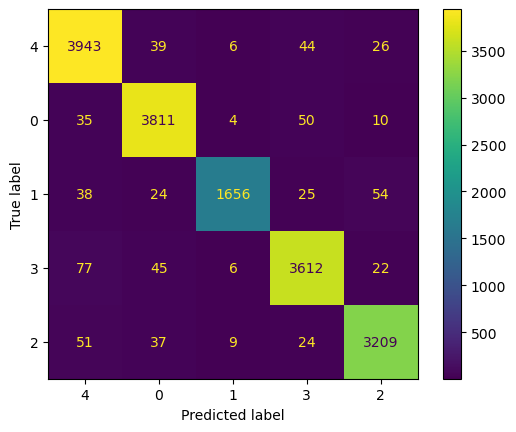

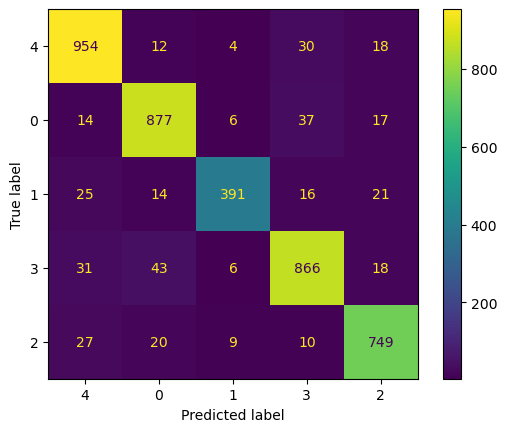

In [72]:
#running and evaluating the Logistic Regression model
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500, 1000],
    'class_weight': [None, 'balanced']
}
model=run_model(LogisticRegression(),params)
eval_model1(train_y,model.predict(train_X),model.predict_proba(train_X),type='Training')
eval_model1(test_y,model.predict(test_X),model.predict_proba(test_X),type='Test')

#### 2.  Decision Tree

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training results
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
ROC AUC Score:  1.0
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4058
           1       1.00      1.00      1.00      3910
           2       1.00      1.00      1.00      1797
           3       1.00      1.00      1.00      3762
           4       1.00      1.00      1.00      3330

    accuracy                           1.00     16857
   macro avg       1.00      1.00      1.00     16857
weighted avg       1.00      1.00      1.00     16857

Test results
Accuracy:  0.77
Precision:  0.77
Recall:  0.77
F1 Score:  0.77
ROC AUC Score:  0.85
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.78      0.78      1018
           1       0.79      0.81      0.80       951
           2       0.74      0.72      0.73     

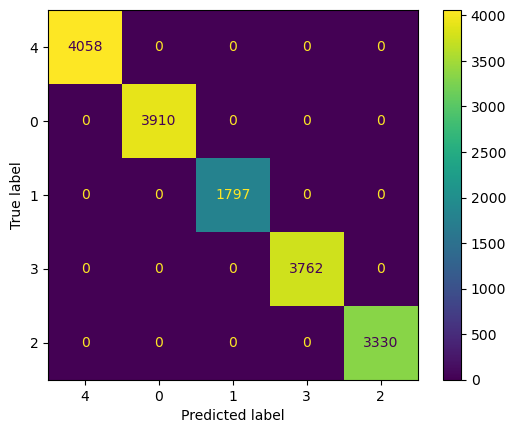

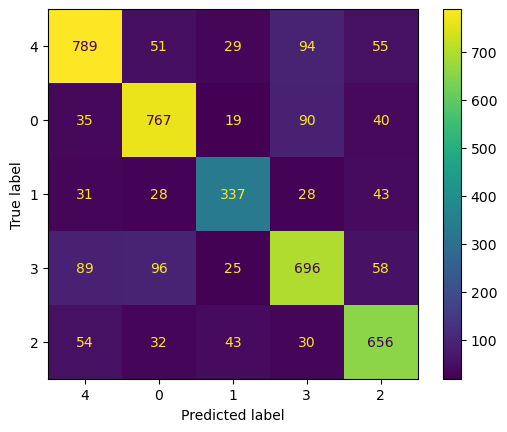

In [73]:
#running and evaluating the Decision Tree model
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
model=run_model(DecisionTreeClassifier(),params)
eval_model1(train_y,model.predict(train_X),model.predict_proba(train_X),type='Training')
eval_model1(test_y,model.predict(test_X),model.predict_proba(test_X),type='Test')

#### 3.  Random Forest

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training results
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
ROC AUC Score:  1.0
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4058
           1       1.00      1.00      1.00      3910
           2       1.00      1.00      1.00      1797
           3       1.00      1.00      1.00      3762
           4       1.00      1.00      1.00      3330

    accuracy                           1.00     16857
   macro avg       1.00      1.00      1.00     16857
weighted avg       1.00      1.00      1.00     16857

Test results
Accuracy:  0.81
Precision:  0.82
Recall:  0.81
F1 Score:  0.8
ROC AUC Score:  0.97
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.90      0.84      1018
           1       0.78      0.86      0.82       951
           2       0.91      0.40      0.56      

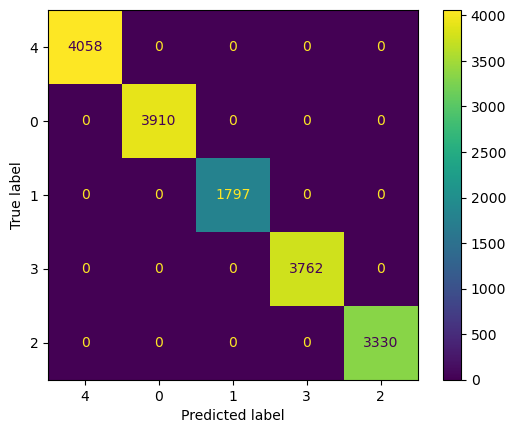

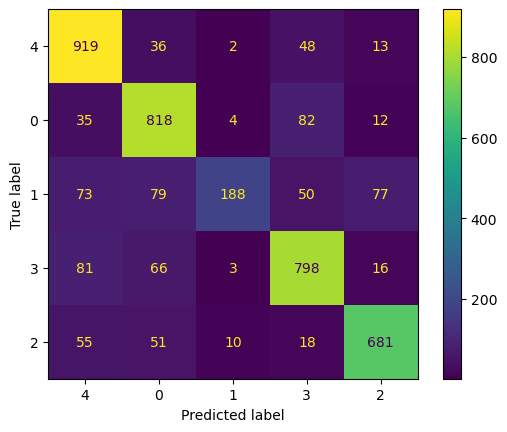

In [74]:
#running and evaluating the Random Forest model
params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
model=run_model(RandomForestClassifier(),params)
eval_model1(train_y,model.predict(train_X),model.predict_proba(train_X),type='Training')
eval_model1(test_y,model.predict(test_X),model.predict_proba(test_X),type='Test')

#### 4.  Multinomial Naive Bayes

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training results
Accuracy:  0.76
Precision:  0.79
Recall:  0.76
F1 Score:  0.72
ROC AUC Score:  0.96
Classification Report:                precision    recall  f1-score   support

           0       0.71      0.94      0.80      4058
           1       0.75      0.81      0.78      3910
           2       1.00      0.02      0.04      1797
           3       0.78      0.84      0.81      3762
           4       0.83      0.79      0.81      3330

    accuracy                           0.76     16857
   macro avg       0.81      0.68      0.65     16857
weighted avg       0.79      0.76      0.72     16857

Test results
Accuracy:  0.72
Precision:  0.74
Recall:  0.72
F1 Score:  0.68
ROC AUC Score:  0.94
Classification Report:                precision    recall  f1-score   support

           0       0.67      0.91      0.77      1018
           1       0.71      0.76      0.74       951
           2       0.86      0.01      0.03

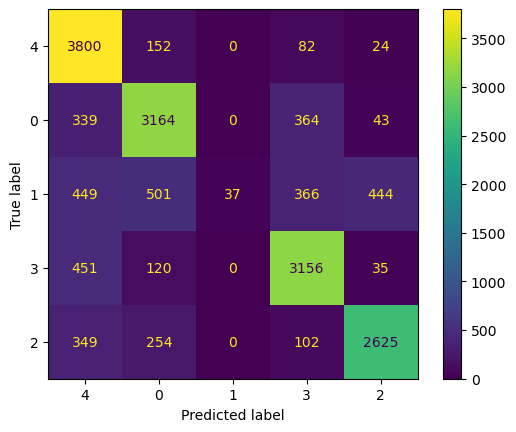

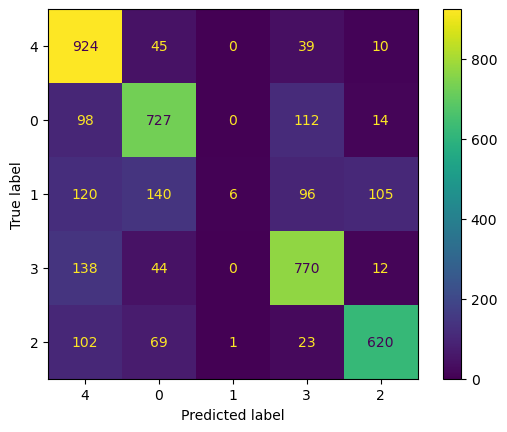

In [75]:
#running and evaluating the Gaussian Naive Bayes model
params = {
    'alpha': [0.1, 0.5, 1, 2, 5],
    'fit_prior': [True, False]
}
model=run_model(MultinomialNB(),params)
eval_model1(train_y,model.predict(train_X),model.predict_proba(train_X),type='Training')
eval_model1(test_y,model.predict(test_X),model.predict_proba(test_X),type='Test')

#### 5.  XGBoost Classifier

In [86]:
joblib.dump(count_vect, 'count_vectorizer_jun29_2025.pkl')
joblib.dump(tfidf_transformer, 'tfidf_transformer_jun29_2025.pkl')

['tfidf_transformer_jun29_2025.pkl']

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training results
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
ROC AUC Score:  1.0
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      4058
           1       1.00      1.00      1.00      3910
           2       1.00      1.00      1.00      1797
           3       1.00      1.00      1.00      3762
           4       1.00      1.00      1.00      3330

    accuracy                           1.00     16857
   macro avg       1.00      1.00      1.00     16857
weighted avg       1.00      1.00      1.00     16857

Test results
Accuracy:  0.91
Precision:  0.91
Recall:  0.91
F1 Score:  0.91
ROC AUC Score:  0.99
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.92      0.92      1018
           1       0.90      0.93      0.92       951
           2       0.93      0.90      0.92     

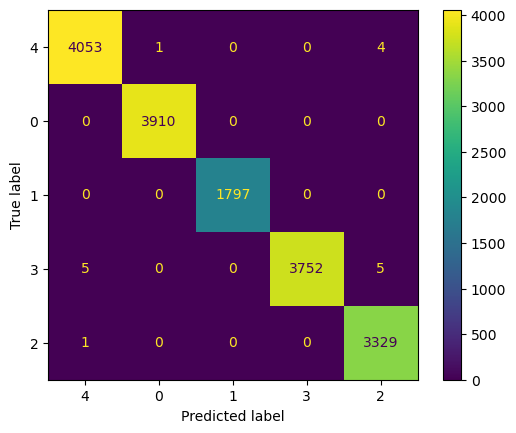

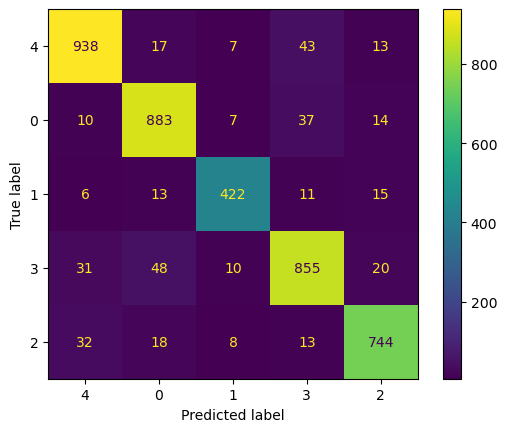

In [76]:
#running and evaluating the XGBoost model
params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0, 0.5, 1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1]
}
model=run_model(XGBClassifier(),params)
eval_model1(train_y,model.predict(train_X),model.predict_proba(train_X),type='Training')
eval_model1(test_y,model.predict(test_X),model.predict_proba(test_X),type='Test')

# Final Results

| Model | Accuracy | Precision | Recall | F1 Score | ROC AUC Score |
|-------|----------|-----------|--------|---------|--------------|
| Logistic Regression | 0.91 | 0.91 | 0.91 | 0.91 | 0.99 |
| DecisionTreeClassifier | 0.78 | 0.78 | 0.78 | 0.78 | 0.86 |
| RandomForestClassifier | 0.82 | 0.83 | 0.82 | 0.81 | 0.97 |
| MultinomialNB | 0.71 | 0.74 | 0.71 | 0.67 | 0.94 |
| XGBClassifier | 0.91 | 0.91 | 0.91 | 0.91 | 0.99 |

# Conclusion
As from the results we can see that Logistic Regression and XGBoost Classifier are performing the best with an F1 score of 0.91. So we will be using these models to predict the topics for the new complaints.


In [77]:
# Applying the best model on the Custom Text
# We will use the XGBoost model as it has the best performance
df_complaints = pd.DataFrame({'complaints': ["I can not get from chase who services my mortgage, who owns it and who has original loan docs", 
                                  "The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.",
                                  "I want to open a salary account at your downtown branch. Please provide me the procedure.",
                                  "Yesterday, I received a fraudulent email regarding renewal of my services.",
                                  "What is the procedure to know my CIBIL score?",
                                  "I need to know the number of bank branches and their locations in the city of Dubai"]})

In [81]:
def predict_lr(text):
    Topic_names = {0:'Banking Transactions and Customer Services', 1:'Credit Reports and Inquiries', 2:'Credit Card Billing and Errors', 3:'Fraudulent Charges and Disputes', 4:'Home Loans and Mortgage Issues'}
    X_new_counts = count_vect.transform(text)
    X_new_tfidf = tfidf_transformer.transform(X_new_counts)
    predicted = model.predict(X_new_tfidf)
    return Topic_names[predicted[0]]

In [82]:
df_complaints['tag'] = df_complaints['complaints'].apply(lambda x: predict_lr([x]))
df_complaints

,complaints,tag
0,"I can not get from chase who services my mortgage, who owns it and who has original loan docs",Home Loans and Mortgage Issues
1,The bill amount of my credit card was debited twice. Please look into the matter and resolve at the earliest.,Credit Reports and Inquiries
2,I want to open a salary account at your downtown branch. Please provide me the procedure.,Banking Transactions and Customer Services
3,"Yesterday, I received a fraudulent email regarding renewal of my services.",Fraudulent Charges and Disputes
4,What is the procedure to know my CIBIL score?,Home Loans and Mortgage Issues
5,I need to know the number of bank branches and their locations in the city of Dubai,Home Loans and Mortgage Issues


The data effectively showcases the variety of customer complaints across different financial product/service categories. The labeled "Topic" column successfully categorizes diverse issues, ranging from 'Home Loans and Mortgage Issues' to 'Credit Reports and Inquiries'. The inconsistencies in topic assignment (e.g., complaint 5 being categorized as "Home Loans and Mortgage Issues" when it seems to be 'Credit Reports and Inquiries') suggest a potential need for refinement in the topic labeling process or a more granular classification system. Overall, this dataset provides a valuable foundation for building a complaint classification model and improving customer service efficiency.

In [84]:
import joblib

In [85]:
joblib.dump(model, 'xgb_model_jun29_2025.pkl')

['xgb_model_jun29_2025.pkl']